In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv


# Salifort Motors: Capstone Project Using Regression

**Outline:**
1. Problem Statement
2. Cleaning the Data
3. EDA
4. Analysis
5. Result

**Problem Statement**

**Overview:** Salifort Motors have received the results of a recent employee survey. Analyze the data to come up with ideas for how to increase employee retention. Design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points you deem helpful. 

**Goal:** Providing data-driven suggestions for HR

1. Predict the company turnover rate
2. What factors can affect the company retention rate the most?

In [2]:
hr_data = pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Cleaning the Data**

In [3]:
#Checking for missing values
pd.DataFrame(hr_data.isnull().sum(), columns=['Missing Values'])

,Missing Values
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


There are no null values, continue to check whether there are duplicates.

**Remove Duplicates**

In [4]:
#check for duplicated rows
print("here are ", hr_data.duplicated().sum(), "duplicated rows.")

hr_data[hr_data.duplicated()].head()

here are  3008 duplicated rows.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
#Create a clean data because there are duplicates
in_file = 'HR_comma_sep.csv'
out_file = 'Clean_HR.csv'

#Drop the duplicates
hr_data.drop_duplicates(subset=None, inplace=True)

#Check again
print("There are ", hr_data.duplicated().sum(), "duplicated rows.")

There are  0 duplicated rows.


In [6]:
#How many rows do we end up with?
len(hr_data.index)

11991

In [7]:
#Data types
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
#Turning the salary into a dummy variable
hr_data['salary'] = hr_data['salary'].replace(['low','medium','high'], ['1','2','3']).copy()

#Changing some data types 
hr_data['salary']= hr_data['salary'].astype(int)
hr_data['time_spend_company']= hr_data['time_spend_company'].astype(int) 
hr_data['promotion_last_5years']= hr_data['promotion_last_5years'].astype(int) 

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


**Remove Outliers**

Logistical regression analysis will be used to analyze discreet data (such as those of the binary data for the dependent variable). Logistic regression analysis is sensitive towards outliers, so rows containing outliers will be dropped.

In [9]:
#Descriptive results 
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0
salary,11991.0,1.603870,0.635900,1.00,1.00,2.00,2.00,3.0


<Axes: >

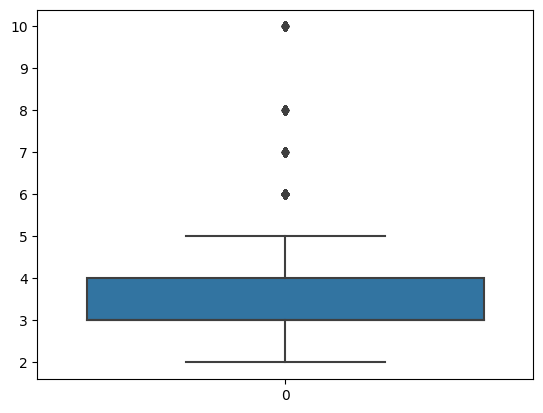

In [10]:
sns.boxplot(hr_data['time_spend_company'])

In [11]:
pct25 = hr_data.time_spend_company.quantile(0.25)
pct75 = hr_data.time_spend_company.quantile(0.75)
iqr = pct75 - pct25

lower = pct25 - 1.5 * iqr
upper = pct75 + 1.5 * iqr

num_row_outlier = len(hr_data[(hr_data.time_spend_company < lower) | (hr_data.time_spend_company > upper)])

print('Number of outliers in tenure: '+str(num_row_outlier))
print('Shape of hr_data before removing outliers:', hr_data.shape)

Number of outliers in tenure: 824
Shape of hr_data before removing outliers: (11991, 10)


In [12]:
#dropping the outliers bcs we use regeression
hr_data = hr_data[(hr_data.time_spend_company >= lower) & (hr_data.time_spend_company <= upper)]

# Print the shape of the DataFrame after removing outliers
print('Shape of hr_data after removing outliers:', hr_data.shape)

#Save it into a new CSV file
hr_data.to_csv(out_file)

Shape of hr_data after removing outliers: (11167, 10)


# **EDA**

Exploratory data analysis

**Employee Status**


<Axes: title={'center': 'Retention Status'}>

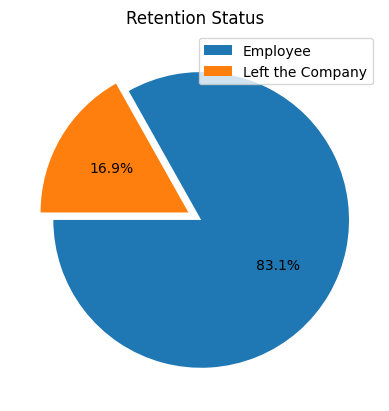

In [13]:
#create a pie chart to see numbers of employee that left the company
labels = ['Employee', 'Left the Company']
explode = [0.05, 0.05]

hr_data['left'].value_counts().plot(kind='pie', explode=explode, autopct='%1.1f%%', startangle=180, legend=True, title='Retention Status', labels=labels, ylabel='', labeldistance=None)

Now we will look into teh factors that might influence this retention.

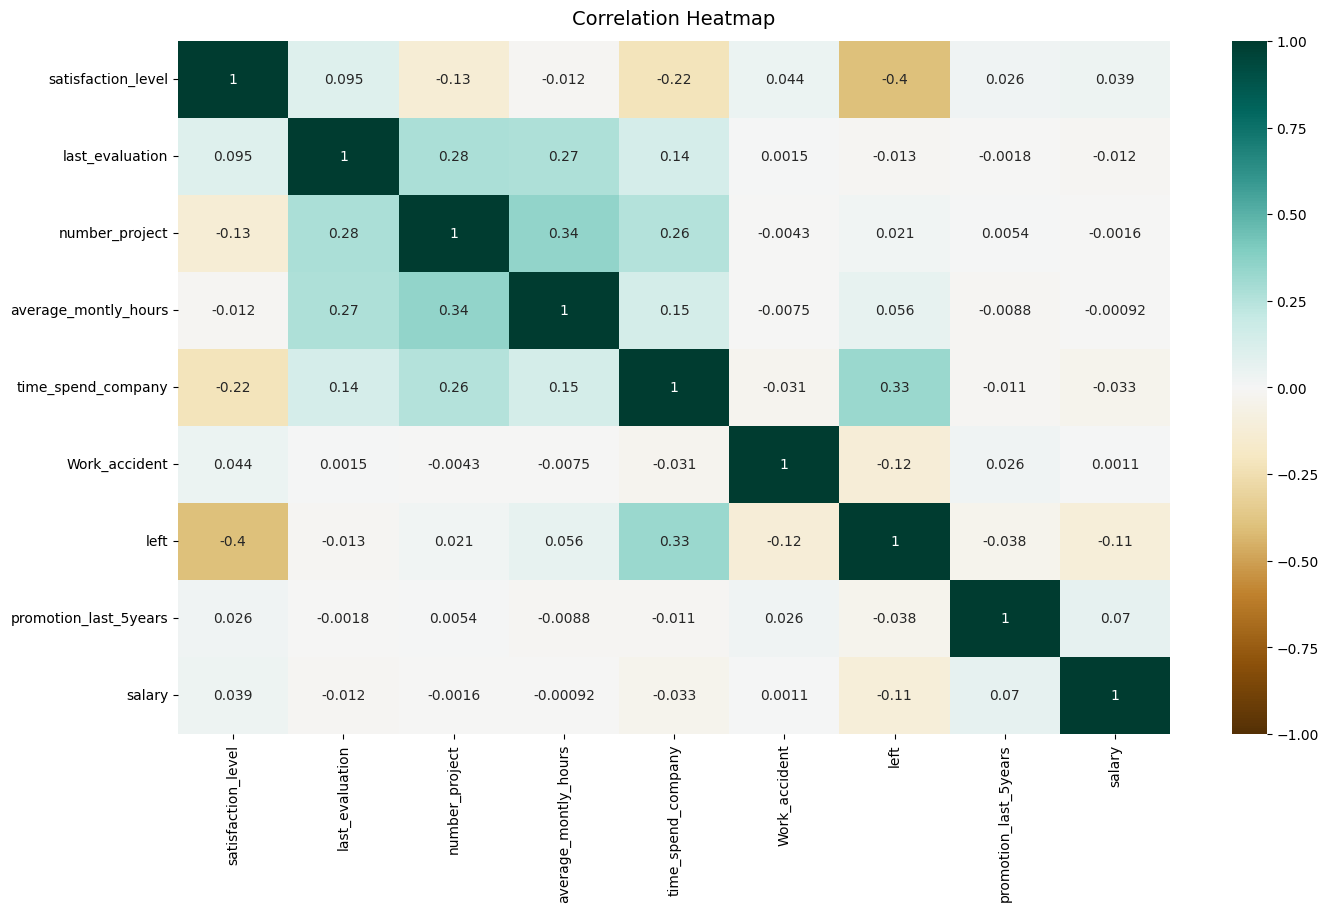

In [14]:
# Plot a correlation heatmap
hr_data1 = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 
                    'average_montly_hours', 'time_spend_company', 'Work_accident',
                    'left', 'promotion_last_5years', 'salary']]

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(hr_data1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("BrBG", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The heatmaps shows rather high correlation between (1) number of project and average monthly hours, (2) time spent in the company and retention, (3) number of project and last evaluation, (4) Last evaluation and average_monthly_hours. So we will also evaluate those models. 

**Project and Average Monthly Hours**

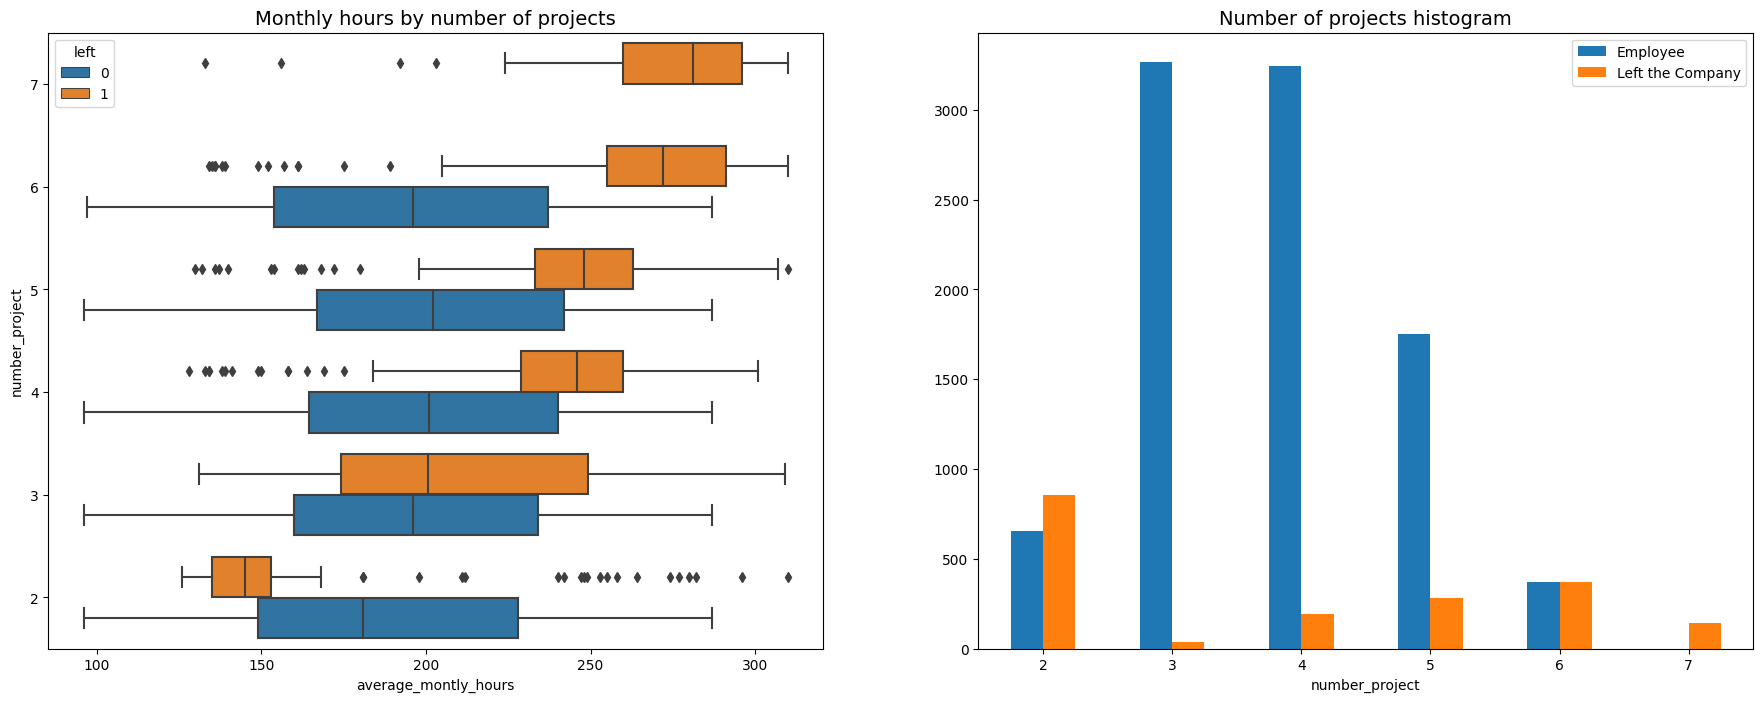

In [15]:
#Project and Average Monthly Hours
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=hr_data1, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = hr_data1[hr_data1['left']==0]['number_project']
tenure_left = hr_data1[hr_data1['left']==1]['number_project']
pd.crosstab(hr_data1['number_project'], hr_data1['left']).plot(kind='bar', title='Number of Projects histogram', rot=0, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.legend(["Employee", "Left the Company"]);
plt.show()

alternative intepretation to the data:
1. Employees that work in more projects and spend longer hours working, tend to exit the company. Employees who worked for 7 projects quit the company as they average >260hr/month. (260/4= 65 Hours per week) These employees worked ~15 to 20 hours more than the average hours.
2. There is an anomaly for employees that work shorter hours and fewer projects, compared to those working in the same number of projects but longer hours. Employees that quit at the start work lesser hour than the average work-hour, can be indicated as contractual or fired employee--thus needed to be analyzed by their evaluation score.
3. No employees stays to do seven projects or more.

**Retention and Time Spent in The Company (Tenure)**

Text(0, 0.5, 'Count')

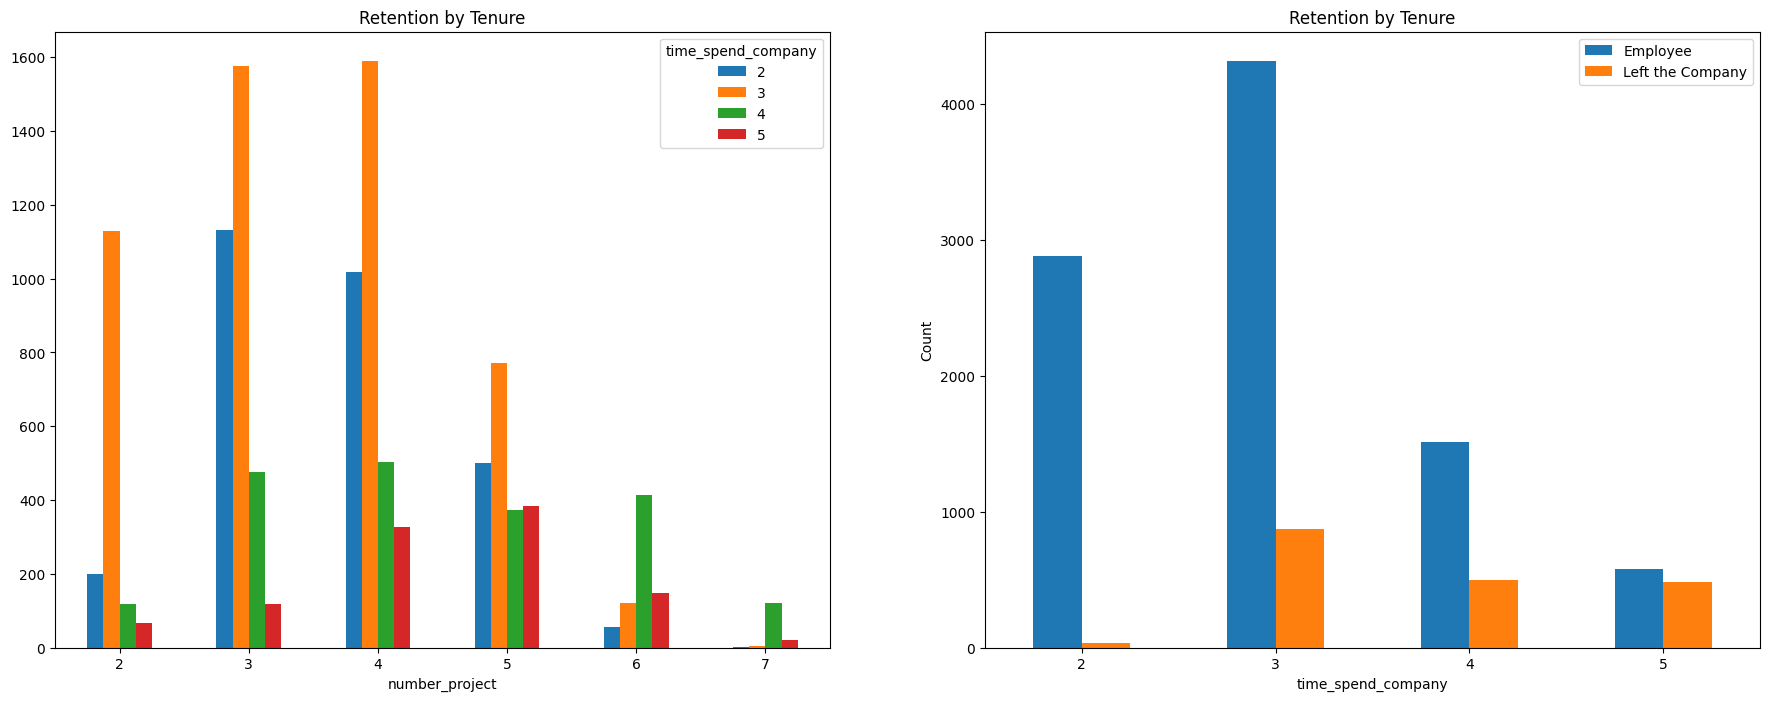

In [16]:
#Time spent and Project
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# distribution of `time spent in the company`, comparing employees who stayed versus those who left
dep_ret = pd.crosstab(hr_data1['number_project'], hr_data1['time_spend_company']).plot(kind='bar', title ='Retention by Tenure', rot=0, ax=ax[0])

# Create histogram showing distribution of `time spent in the company`, comparing employees who stayed versus those who left
dep_ret1 = pd.crosstab(hr_data1['time_spend_company'], hr_data1['left']).plot(kind='bar', title ='Retention by Tenure', rot=0, ax=ax[1])

plt.legend(["Employee", "Left the Company"]);
plt.ylabel("Count")

The optimum number of project is between three to four projects, in the span of three years tenure. After that, employees tend to leave the company after working for 3 years or more.

**Retention and Department**

Text(0, 0.5, 'Count')

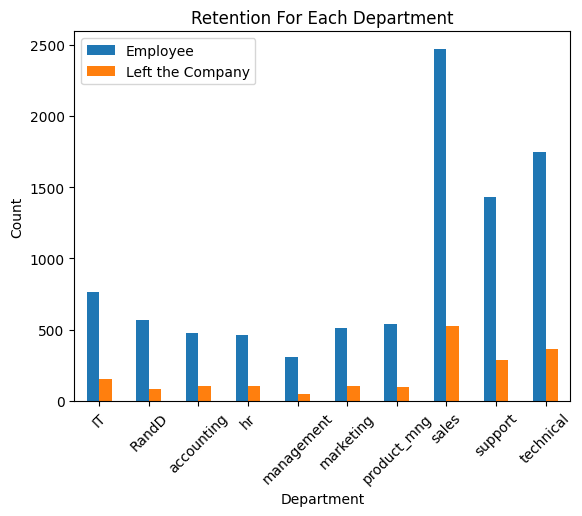

In [17]:
#Bar Chart Showing Department and their Retention
dep_ret = pd.crosstab(hr_data['Department'], hr_data['left']).plot(kind='bar', title ='Retention For Each Department', rot=45)

plt.legend(["Employee", "Left the Company"]);
plt.ylabel("Count")

Departments with some of the highest retention include Sales, Technical, and Support department.

**Retention and Promotion**

Text(0, 0.5, 'Count')

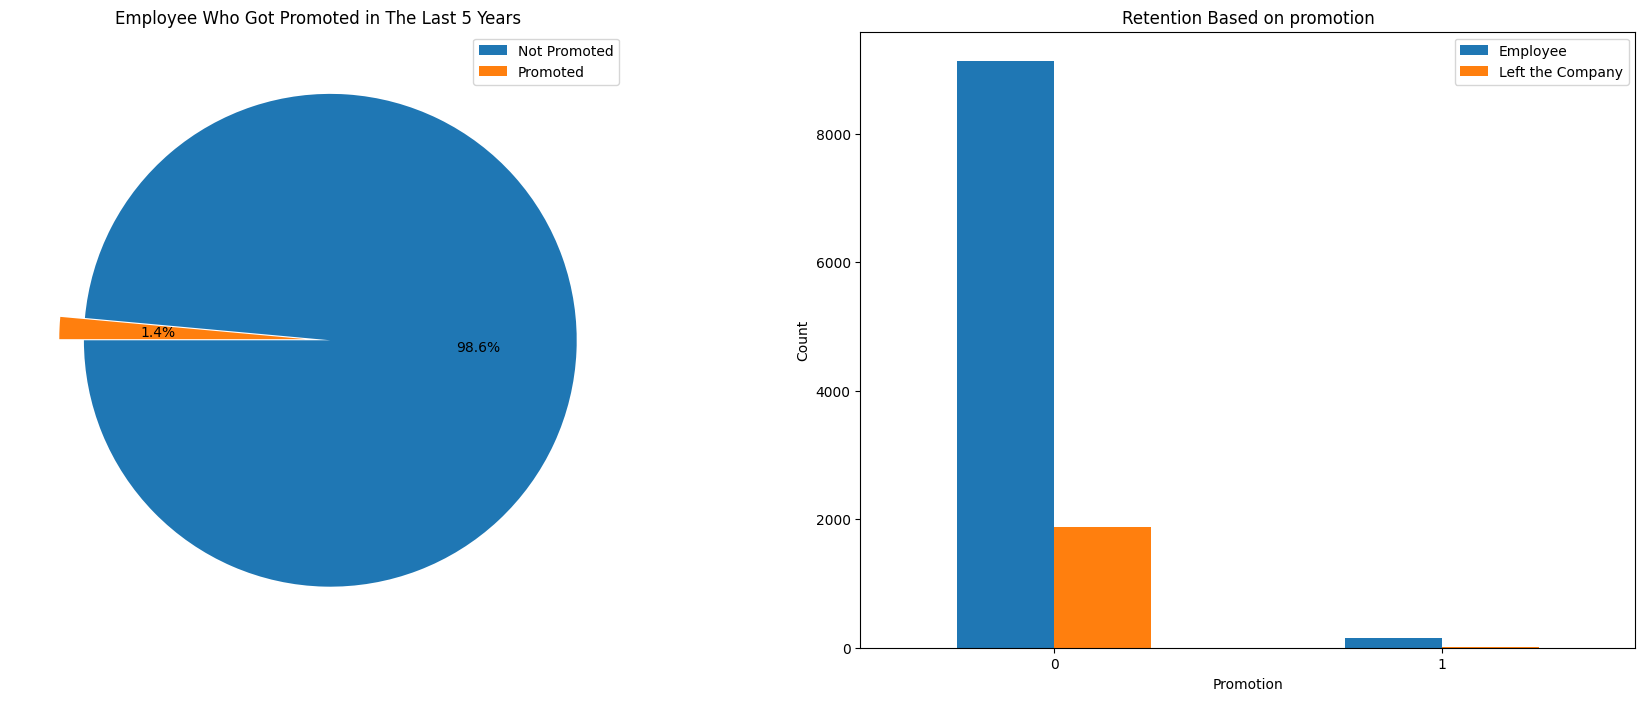

In [18]:
#Time spent and Project
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#How many people actually got promotion?
labels= ['Not Promoted', 'Promoted']

chart_pro = hr_data['promotion_last_5years'].value_counts(()).plot(kind='pie', explode=explode, autopct='%1.1f%%', startangle=180, legend=True, title='Employee Who Got Promoted in The Last 5 Years', labels=labels, ylabel='', labeldistance=None, ax=ax[0])

#Bar Chart Showing Promotion Status in The Last 5 years and their Retention
pro_ret = pd.crosstab(hr_data['promotion_last_5years'], hr_data['left']).plot(kind='bar', title ='Retention Based on promotion', rot=0, ax=ax[1])

plt.legend(["Employee", "Left the Company"]);
plt.xlabel("Promotion")
plt.ylabel("Count")

Insights:
1. Only one in a hundred employee can get a promotion. 
2. Majority left after not being promoted in the last 5 years. 
3. Those who got promoted will more likely to stay at the company.

Company can create benefits or career progression programm to minimize retention due to not being promoted.

**Rentention and Salary**

Text(0, 0.5, 'Count')

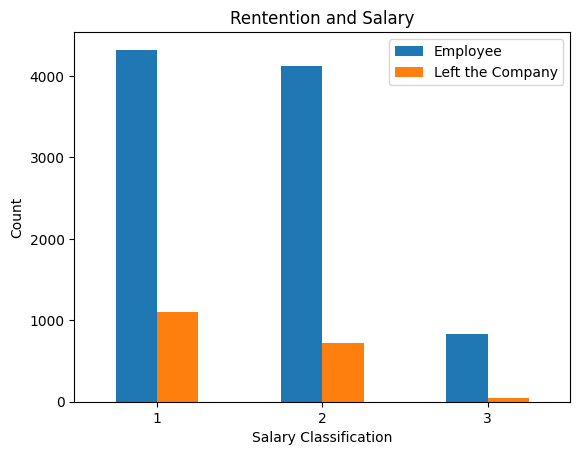

In [19]:
ret_pro = pd.crosstab(hr_data['salary'], hr_data['left']).plot(kind='bar', title="Rentention and Salary", rot=0)

plt.legend(["Employee", "Left the Company"]);
plt.xlabel("Salary Classification")
plt.ylabel("Count")

retention rate is more prevalent on employees with low and medium salary.

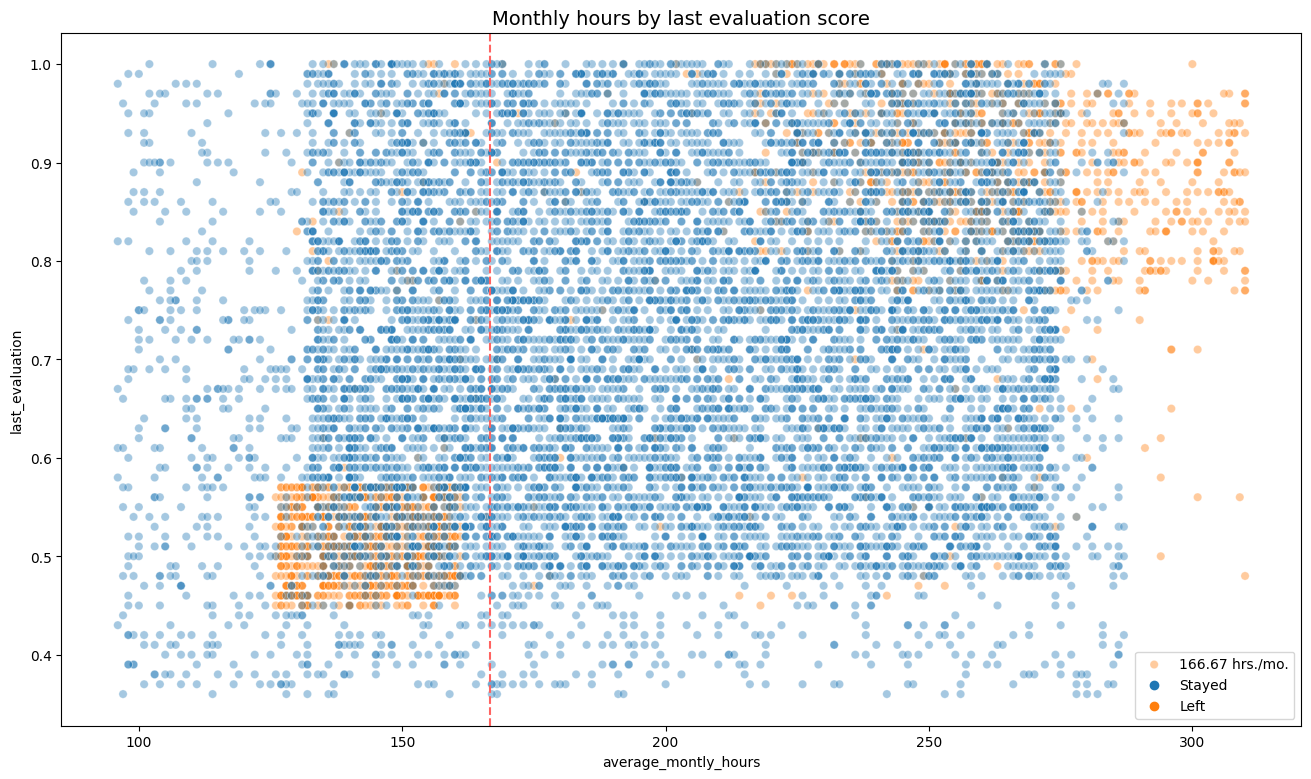

In [20]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=hr_data, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

plt.show()

Alternative insights:
1. Though have high evaluation score, employees with working hours in the range of ~220-280 hours are prone to leaving the company, thus the company can create a maximum working hours <250 hours per month.
2. Low working hours can be those of employees who are cut-off (fired) of their low performance.
3. 

# Logistic Regression Analysis

Why logistic regression? because the data provide discrete data tyeps (such as binary) to predict retention rate, which is the probability of an employee to exit the company. Result type will be 1 unit increase in X, will increase the log probability by α

In [21]:
#Start calculating regression between variables
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
#Selecting Data that might effect turnover
sel_data = hr_data[['satisfaction_level', 'time_spend_company', 'promotion_last_5years', 'salary', ]]
sel_data.head()

,satisfaction_level,time_spend_company,promotion_last_5years,salary
0,0.38,3,0,1
2,0.11,4,0,2
3,0.72,5,0,1
4,0.37,3,0,1
5,0.41,3,0,1


assigning the data into the equation
y = Bo+BX1+BX2+BX3+BX4

In [23]:
#Estalishing X and y
X = sel_data #Satisfaction level, tenure, promotion, and  salary as predictor
y = hr_data['left'] #retention as dependent

In [24]:
#Train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

(7481, 4)
(7481,)


In [25]:
#Logistic regression
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

**Confusion Matrix**

confusion matrix to visualize the results of the logistic regression model.

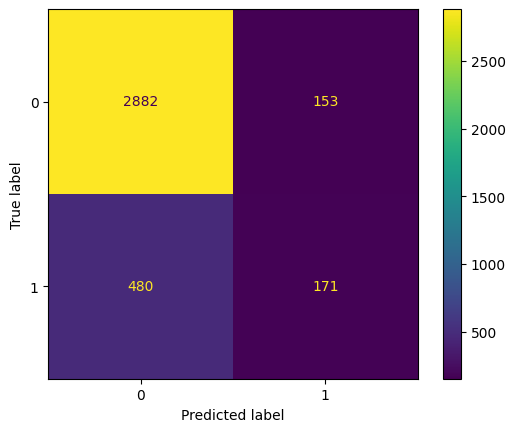

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_reg.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

This metric shows the number of 

a. number of employee who are predicted to leave, but is not (153) 

b. number of employee who are predicted to stay, but is leaving (480)

c. number of employee who are actually leaving, after predicted to leave (171)

d. number of employee who are actually staying, after predicted to stay (2882)

In [27]:
# Checking class balance
print(hr_data['left'].value_counts(normalize=True))

print('Test accuracy = ', log_reg.score(X_test, y_test))

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64
Test accuracy =  0.8282691264243082


Addressing class imbalances ensure that the model doesn't become biased toward the majority class. In this case, those that stay in the company is the majority class, and those who left is the minority class. There is a clear imbalance towards those who stay at the company which represent a proportion of approximately 83.15%. While those who left has a proportion of approximately 16.85%. 

Few suggestion to ensure that the model doesn't become biased toward the majority class: (1) Consider techniques such as resampling, (2) using different evaluation metrics, or (3) employing specialized algorithms designed to handle imbalanced datasets to ensure fair and accurate model training and evaluation.

Meanwhile, a logit accuracy of 82% means that **the logistic regression model correctly predicted the outcome for approximately 82% of the observations** in the dataset.

**using statsmodels**

In [28]:
import statsmodels.api as sm

# Logit Model
model = sm.Logit(y_train, X_train).fit()

# Summary
result = model.summary()
print(result)

Optimization terminated successfully.
         Current function value: 0.338888
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 7481
Model:                          Logit   Df Residuals:                     7477
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2421
Time:                        01:34:30   Log-Likelihood:                -2535.2
converged:                       True   LL-Null:                       -3345.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -4.4427      0.131    -34.019      0.000      -4.699      -4.

Higher pseudo *R*-Square indicate a better model-fit. In this case, the Pseudo *R*-squared value of 0.242, suggests that approximately 24.2% of the variation in the dependent variable is explained by the independent variables included in the model. 
* The *P*-value suggest that under promotion history can only achieve a 90% significance level. While the others have reached an over 99% significance level. 
* All but time spent in the company yield negative coefficient result, meaning the higher their satisfaction level, the more promotion they get, and the higher the salary they get, the more unlikely they will exit the company.
* The more time they spent at the company, the more they will want to exit the company.